#El Rapido

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from econometron.utils.data_preparation import TransformTS

In [2]:
GDP=pd.read_csv("../../Data_Fred/gdp.csv", index_col=0, parse_dates=True)
Inflation=pd.read_csv("../../Data_Fred/inflation.csv", index_col=0, parse_dates=True)
Interest_Rate=pd.read_csv("../../Data_Fred/int_rate.csv", index_col=0, parse_dates=True)

In [3]:
mac_data=pd.concat([GDP, Inflation, Interest_Rate], axis=1).dropna()


=== Time Series Analysis ===

Stationarity Check (ADF Test):
Column GDP: Stationary, p-value: 0.0000, ADF Statistic: -4.9856
Column DPCCRV1Q225SBEA: Stationary, p-value: 0.0276, ADF Statistic: -3.0857
Column DFF: Stationary, p-value: 0.0000, ADF Statistic: -5.6126

Summary Statistics:
               GDP  DPCCRV1Q225SBEA         DFF
count   140.000000     1.410000e+02  140.000000
mean    172.066757     2.834612e-16   -0.026000
std     261.390203     1.116470e+00    0.719533
min   -1792.213000    -2.962411e+00   -2.720000
25%      96.405500    -6.624113e-01   -0.170000
50%     151.305500    -2.624113e-01    0.000000
75%     222.718000     4.375887e-01    0.242500
max    1749.107000     3.937589e+00    2.270000

NaN Counts:
GDP                1
DPCCRV1Q225SBEA    0
DFF                1
dtype: int64

Correlation Matrix:
                      GDP  DPCCRV1Q225SBEA       DFF
GDP              1.000000         0.500033  0.261576
DPCCRV1Q225SBEA  0.500033         1.000000  0.169277
DFF         

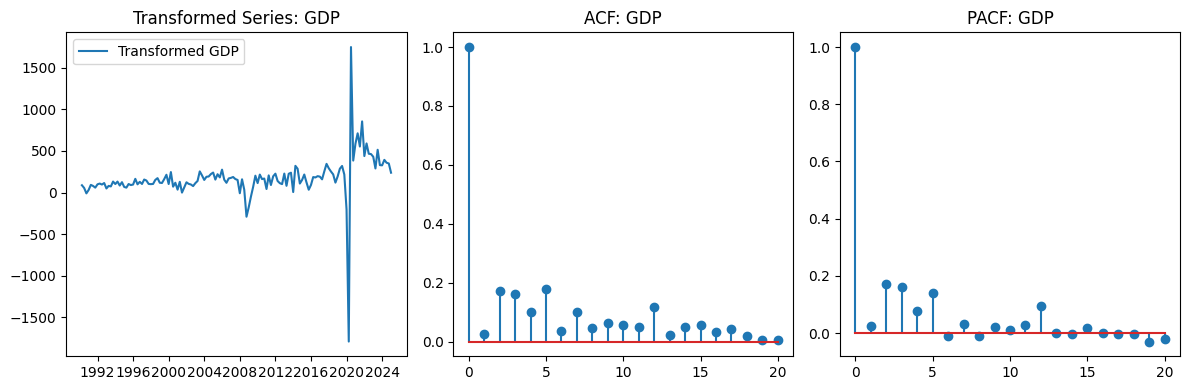

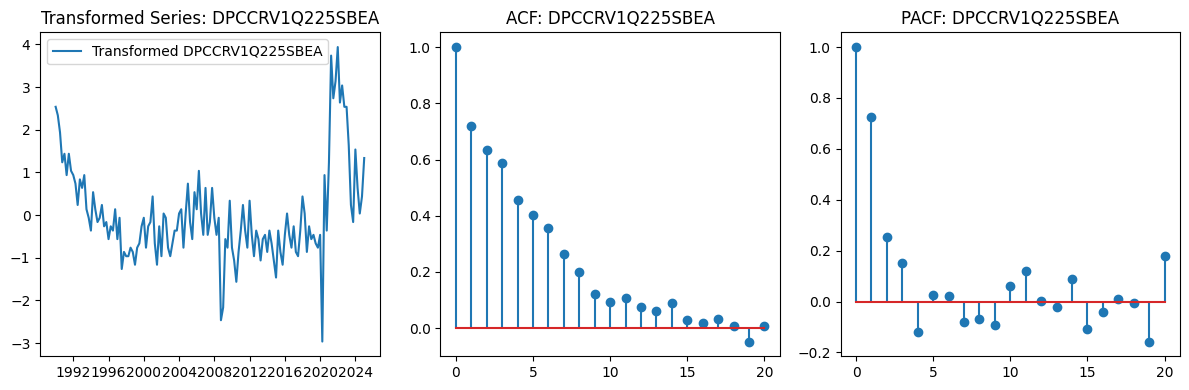

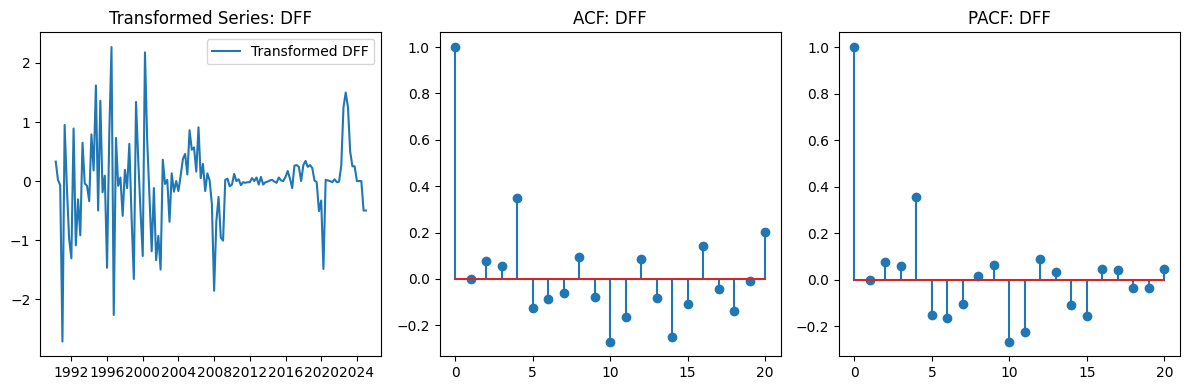

In [4]:
TSP=TransformTS(mac_data,method='diff',analysis=True,plot=True)

In [5]:
data=TSP.get_transformed_data()

In [6]:
data

,GDP,DPCCRV1Q225SBEA,DFF
observation_date,,,
1990-04-01,87.327,2.337589,0.33
1990-07-01,55.088,1.937589,0.02
1990-10-01,-10.383,1.237589,-0.07
1991-01-01,30.445,1.437589,-2.72
1991-04-01,91.684,0.937589,0.95
...,...,...,...
2024-01-01,327.102,1.537589,0.00
2024-04-01,392.645,0.637589,0.00
2024-07-01,358.200,0.037589,0.00


<Axes: xlabel='observation_date'>

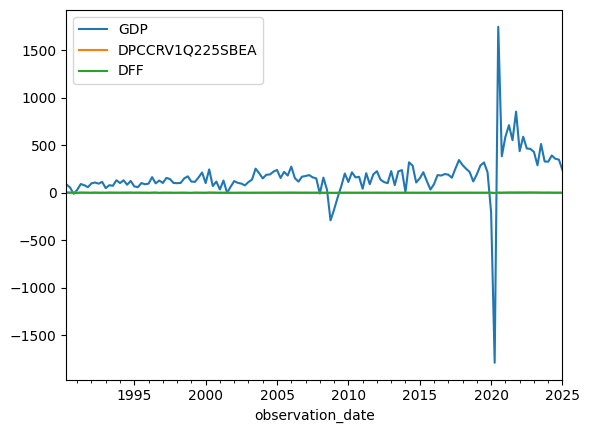

In [7]:
data.plot()

In [8]:
TSP.trns_info()

{'GDP': {'transformation_method': 'diff',
  'differencing_order': 1,
  'is_stationary': True,
  'p_value': 2.369131117511409e-05,
  'adf_statistic': -4.985648421451818,
  'is_log_transformed': False,
  'boxcox_lambda': None,
  'original_stationarity': True,
  'details': 'Applied differencing 1 time(s) to achieve stationarity.'},
 'DPCCRV1Q225SBEA': {'transformation_method': 'diff',
  'differencing_order': 0,
  'is_stationary': True,
  'p_value': 0.027631303374830708,
  'adf_statistic': -3.0856792159654907,
  'is_log_transformed': False,
  'boxcox_lambda': None,
  'original_stationarity': True,
  'details': 'No differencing applied (series was already stationary).'},
 'DFF': {'transformation_method': 'diff',
  'differencing_order': 1,
  'is_stationary': True,
  'p_value': 1.1938199909620645e-06,
  'adf_statistic': -5.612639788063522,
  'is_log_transformed': False,
  'boxcox_lambda': None,
  'original_stationarity': True,
  'details': 'Applied differencing 1 time(s) to achieve stationari

In [9]:
from econometron.Models.VectorAutoReg.VAR import VAR

In [10]:
data.isna().sum()

GDP                0
DPCCRV1Q225SBEA    0
DFF                0
dtype: int64

In [11]:
vm=VAR(data,max_p=10,check_stationarity=True,plot=True)

Performing stationarity checks...

Column: GDP
Verdict , The serie : GDP is stationary

Column: DPCCRV1Q225SBEA
Verdict , The serie : DPCCRV1Q225SBEA is stationary

Column: DFF
Verdict , The serie : DFF is stationary


C:\Users\ASUS\econometron\econometron\Models\VectorAutoReg\VAR.py:124: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  results=kpss(series.dropna(),regression='c', nlags='auto')
C:\Users\ASUS\econometron\econometron\Models\VectorAutoReg\VAR.py:124: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  results=kpss(series.dropna(),regression='c', nlags='auto')
C:\Users\ASUS\econometron\econometron\Models\VectorAutoReg\VAR.py:124: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  results=kpss(series.dropna(),regression='c', nlags='auto')


In [12]:
 9.38424 

9.38424

In [13]:
9.51611 

9.51611

In [14]:
vm.order_select()

,p,aic,bic,hqic
0,4,9.367855,10.187312,9.700858
1,5,9.409163,10.417726,9.819013
2,6,9.476147,10.673816,9.962844
3,7,9.506115,10.892889,10.069658
4,1,9.514875,9.767016,9.617337
5,2,9.555721,9.996968,9.735031
6,3,9.573787,10.204139,9.829944
7,8,9.606017,11.181897,10.246407
8,9,9.687082,11.452067,10.404319
9,10,9.701056,11.655147,10.495140


Selecting only columns with numeric data
1 10
inf
9.514874916663851
VAR(4) Coefficient Table

Constant Parameters:
------------------------------------------------------------------------------------------------------------------------
Variable       | GDP_coef     GDP_se     GDP_z    GDP_p   | DPCCRV1Q225SBEA_coef DPCCRV1Q225SBEA_se DPCCRV1Q225SBEA_z DPCCRV1Q225SBEA_p| DFF_coef     DFF_se     DFF_z    DFF_p   
------------------------------------------------------------------------------------------------------------------------
Constant       |   178.2480    49.0456   3.6343   0.0003|    -0.1428     0.1333  -1.0710   0.2842|    -0.0320     0.1232  -0.2600   0.7948

Lag 1 Parameters:
------------------------------------------------------------------------------------------------------------------------
Variable       | GDP_coef     GDP_se     GDP_z    GDP_p   | DPCCRV1Q225SBEA_coef DPCCRV1Q225SBEA_se DPCCRV1Q225SBEA_z DPCCRV1Q225SBEA_p| DFF_coef     DFF_se     DFF_z    DFF_p   
------

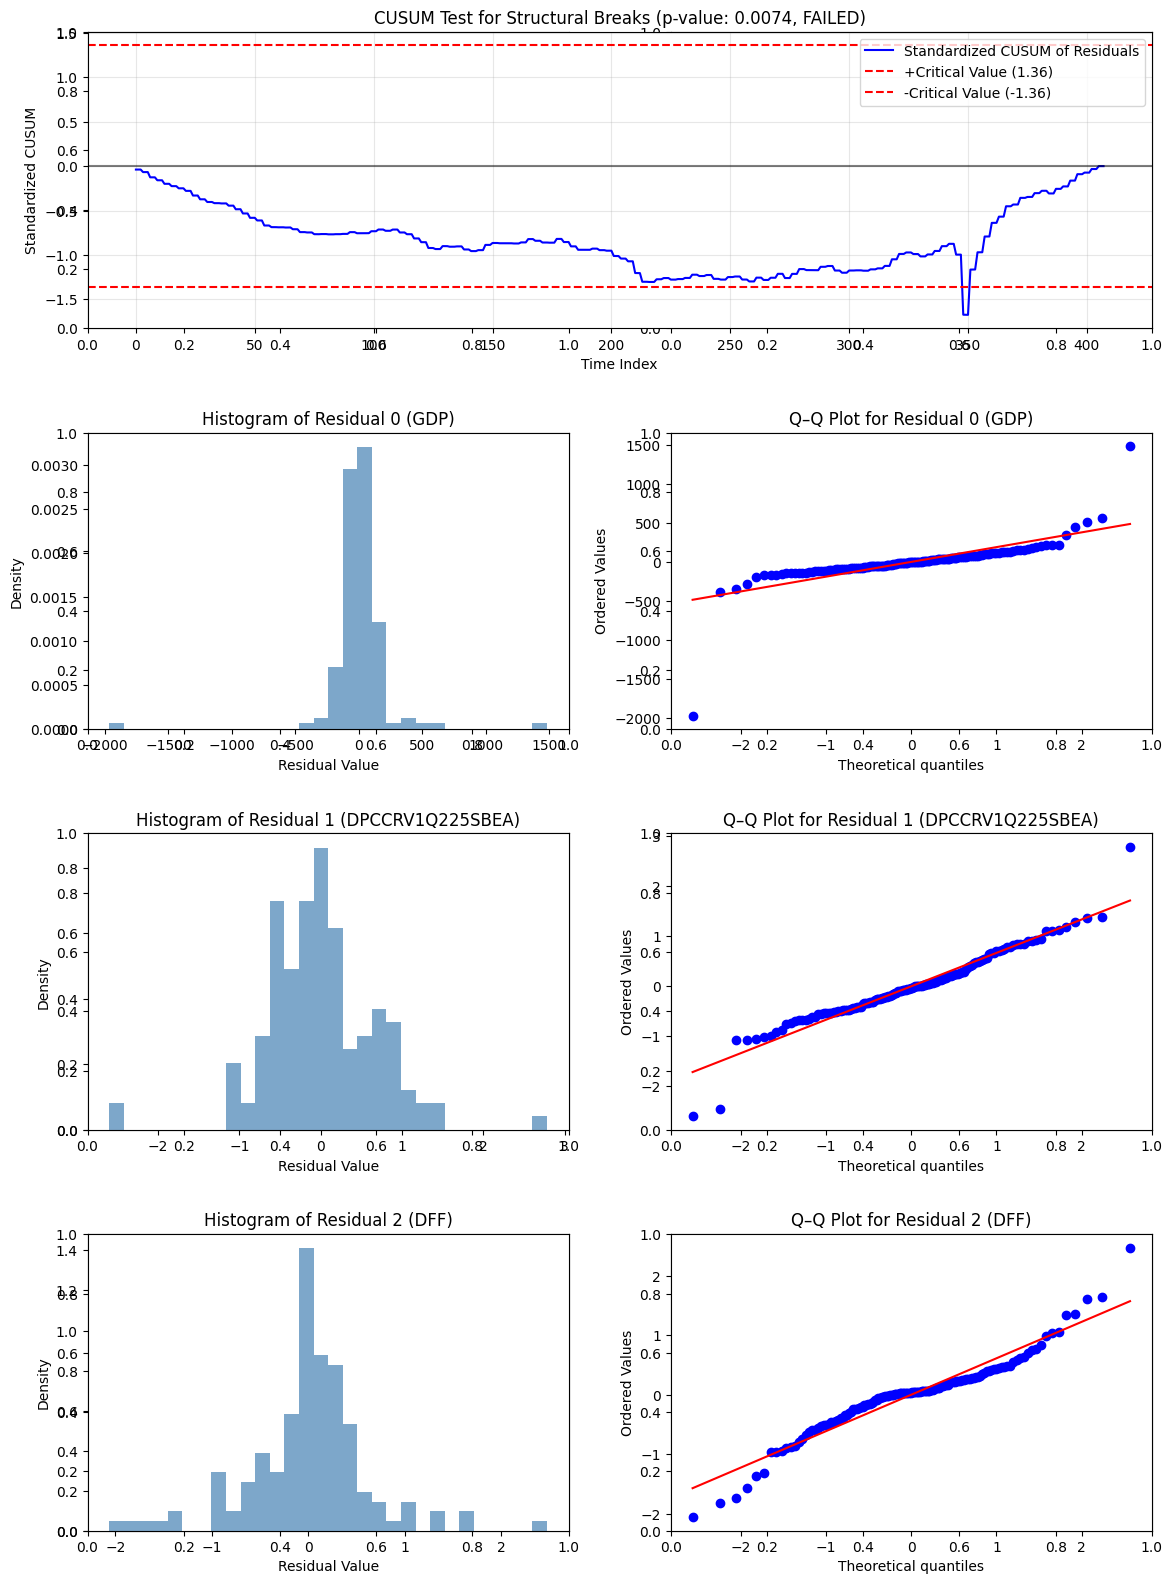

Plots are below


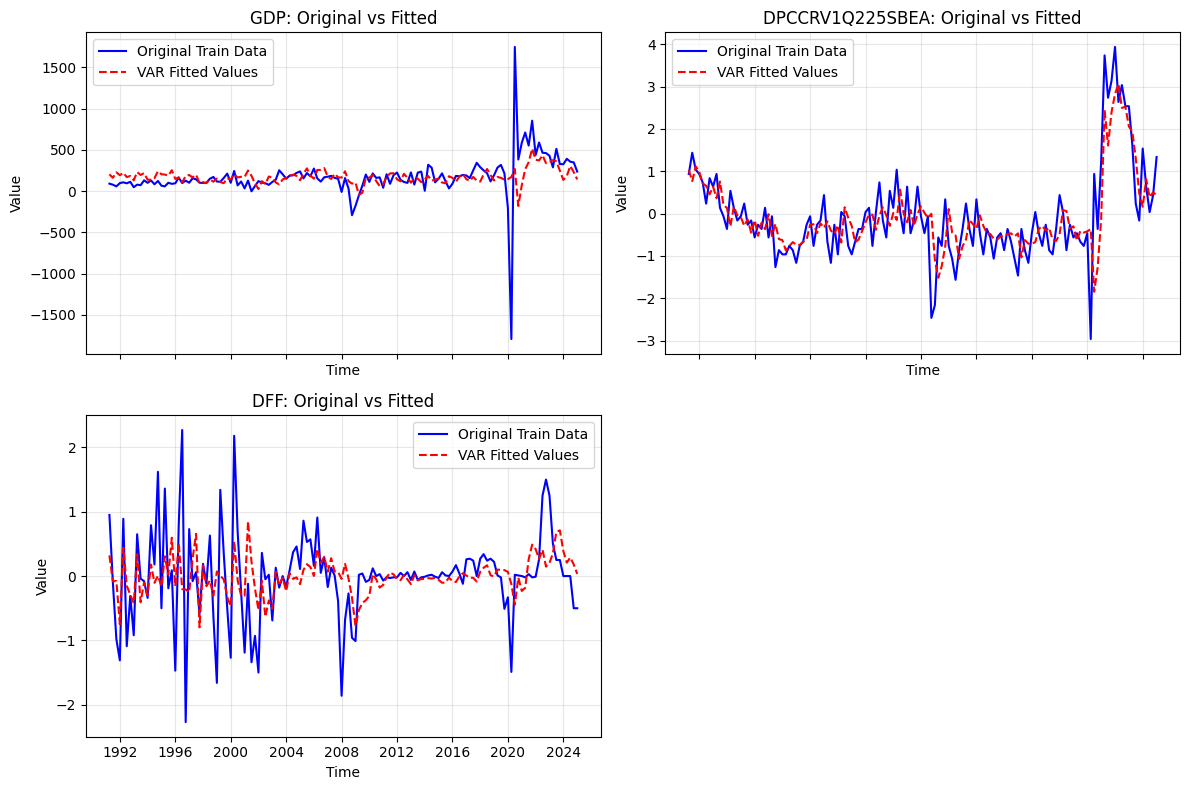

In [15]:
model_1=vm.fit()

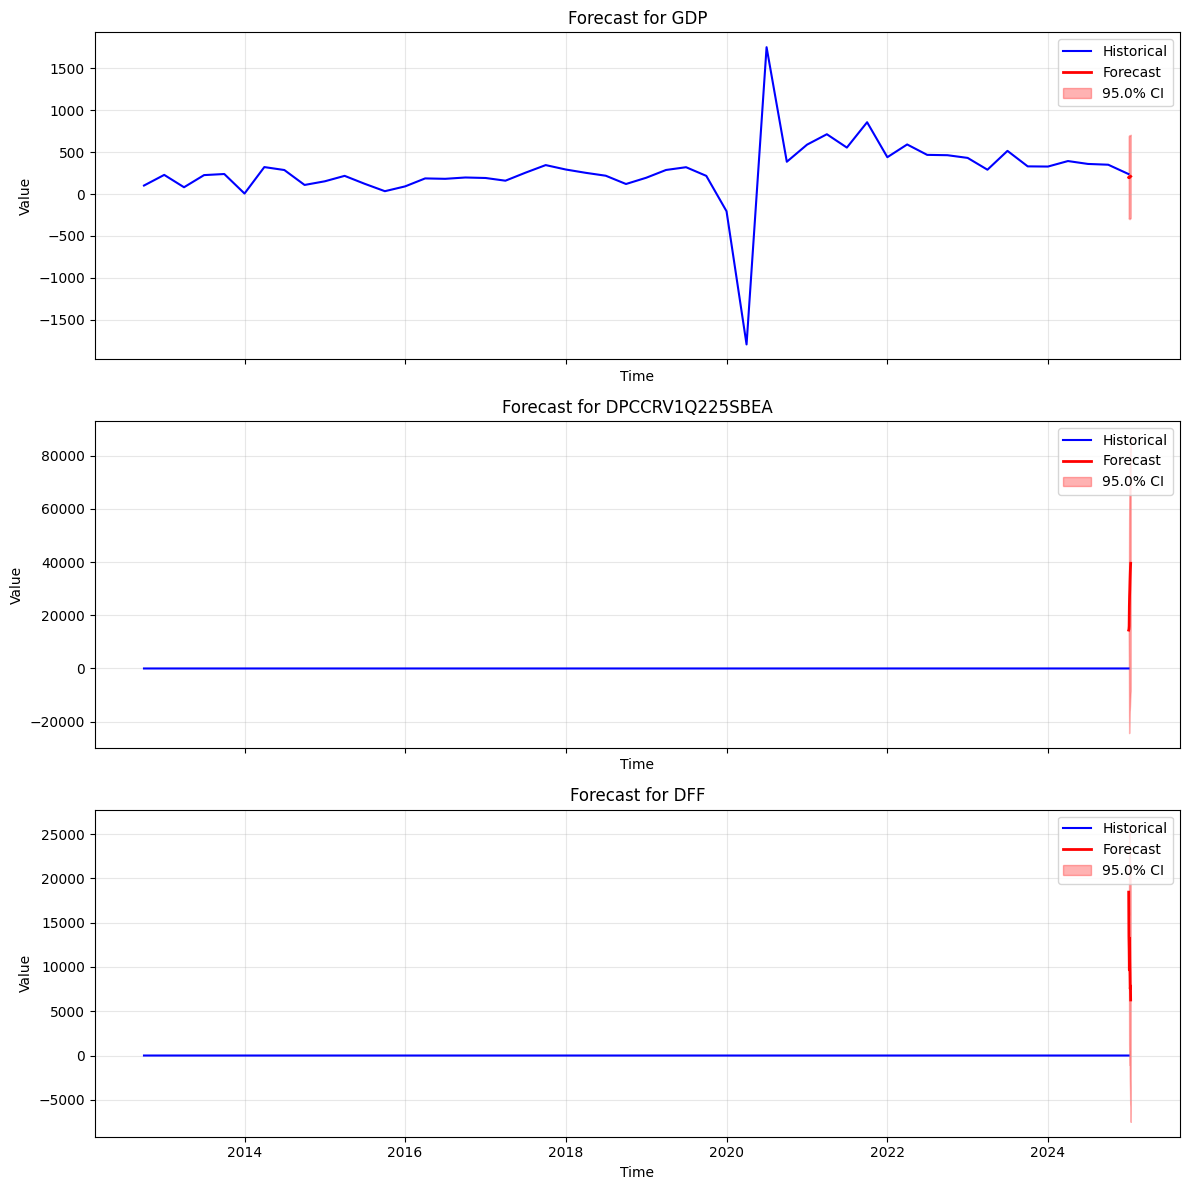

In [16]:
prediction=vm.predict(10)

In [17]:
prediction['point']

,GDP,DPCCRV1Q225SBEA,DFF
2025-01-02,198.061388,14423.469583,18455.643637
2025-01-03,203.575354,14719.877069,13452.873804
2025-01-04,202.219018,15928.057751,11975.035830
2025-01-05,201.985068,23389.238747,9668.746596
2025-01-06,195.402654,27173.711755,13266.457974
2025-01-07,202.351036,29720.138873,10603.425396
2025-01-08,205.688560,32938.314958,9247.572777
2025-01-09,205.409619,35678.801377,7529.920601
2025-01-10,206.880790,37878.889099,7866.938148
2025-01-11,209.503018,39529.867282,6275.978345


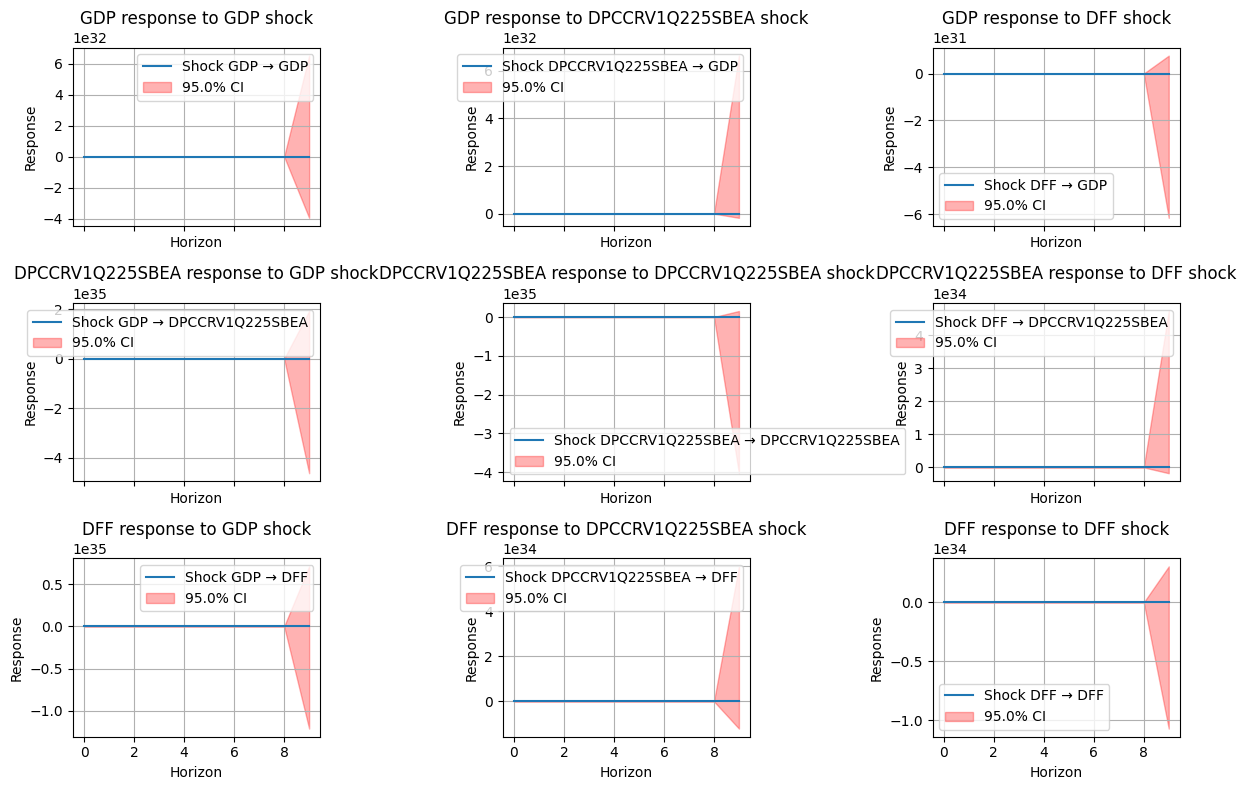

(array([[[ 2.50088129e+02,  0.00000000e+00,  0.00000000e+00],
         [ 4.10802717e-01,  5.41623751e-01,  0.00000000e+00],
         [ 1.39485667e-01,  4.24799827e-02,  6.11277871e-01]],
 
        [[-2.19537118e+01,  1.69252992e-06,  1.33571428e-04],
         [ 6.00836432e+03,  2.68901240e-01,  1.61811965e-02],
         [ 1.22768199e+03, -1.68788581e-02, -3.99005874e-02]],
 
        [[ 1.88685494e+00,  3.56711000e-04, -5.17896777e-05],
         [ 1.96293701e+04,  1.88215670e-01,  6.38496998e-02],
         [ 5.30551020e+03, -3.46830775e-02,  2.19317276e-02]],
 
        [[ 2.34705457e+01,  3.46646464e-04,  5.94701301e-05],
         [ 7.96897154e+03,  2.38757670e-01,  3.50475389e-02],
         [-4.91190609e+02, -4.79354930e-02,  2.92090572e-02]],
 
        [[ 2.04626427e+01, -1.21818388e-05,  4.16586999e-05],
         [-3.77539860e+02,  1.99501740e-01,  5.42913868e-03],
         [ 3.58546194e+03, -6.53365686e-02,  2.01669919e-01]],
 
        [[ 9.21594734e+00,  1.46115242e-04,  8.38525740

In [18]:
vm.impulse_res(plot=True,orth=True,bootstrap=True)

In [19]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [20]:
model = VAR(data)

c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [21]:
order=model.select_order(15)

In [22]:
order.summary()

,AIC,BIC,FPE,HQIC
0,10.13,10.19,2.498e+04,10.15
1,9.468*,9.740*,1.294e+04*,9.579*
2,9.502,9.977,1.339e+04,9.695
3,9.522,10.20,1.367e+04,9.798
4,9.515,10.40,1.359e+04,9.873
5,9.594,10.68,1.474e+04,10.04
6,9.665,10.95,1.586e+04,10.19
7,9.718,11.21,1.679e+04,10.32
8,9.819,11.52,1.868e+04,10.51
9,9.901,11.80,2.041e+04,10.67


In [23]:
results = model.fit(4)

In [24]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 05, Aug, 2025
Time:                     02:25:33
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    10.2195
Nobs:                     136.000    HQIC:                   9.72366
Log likelihood:          -1178.06    FPE:                    11920.3
AIC:                      9.38424    Det(Omega_mle):         9064.52
--------------------------------------------------------------------
Results for equation GDP
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                    178.248004        49.045644            3.634           0.000
L1.GDP                    -0.087784         0.112435           -0.781           0.435
L1.DPCCRV1Q225SBEA        24.024161       

In [25]:
results.coefs

array([[[-8.77840008e-02,  2.40241612e+01,  4.90907666e+00],
        [-1.40131366e-05,  4.94396244e-01, -2.60439415e-02],
        [ 2.18511801e-04,  2.64710980e-02, -6.52740583e-02]],

       [[-8.98353487e-04,  6.85907290e+01,  2.25917097e+01],
        [ 6.76629327e-04,  9.59087167e-02, -5.56045244e-02],
        [-5.09076908e-05,  8.78439257e-02,  3.12345089e-02]],

       [[ 7.48900487e-02, -4.39785587e+00,  4.59366672e+00],
        [ 3.74281241e-04,  2.10187554e-01, -6.24225616e-02],
        [ 6.24368975e-05, -5.01330343e-03,  5.18359734e-02]],

       [[ 3.61902690e-02, -3.47860984e+01,  1.97575435e+01],
        [-3.60811640e-04, -3.72306682e-02, -1.06066779e-01],
        [-2.40692556e-05, -3.53552153e-02,  3.44683576e-01]]])

In [26]:
model_1['beta']

array([[ 1.78248004e+02, -1.42778776e-01, -3.20484956e-02],
       [-8.77840008e-02, -1.40131366e-05,  2.18511801e-04],
       [ 2.40241612e+01,  4.94396244e-01,  2.64710980e-02],
       [ 4.90907666e+00, -2.60439415e-02, -6.52740583e-02],
       [-8.98353487e-04,  6.76629327e-04, -5.09076908e-05],
       [ 6.85907290e+01,  9.59087167e-02,  8.78439257e-02],
       [ 2.25917097e+01, -5.56045244e-02,  3.12345089e-02],
       [ 7.48900487e-02,  3.74281241e-04,  6.24368975e-05],
       [-4.39785587e+00,  2.10187554e-01, -5.01330343e-03],
       [ 4.59366672e+00, -6.24225616e-02,  5.18359734e-02],
       [ 3.61902690e-02, -3.60811640e-04, -2.40692556e-05],
       [-3.47860984e+01, -3.72306682e-02, -3.53552153e-02],
       [ 1.97575435e+01, -1.06066779e-01,  3.44683576e-01]])

In [27]:
model_1['residuals']

array([[-1.12451578e+02, -8.94326579e-02,  6.28978853e-01],
       [-8.38872464e+01,  6.66658374e-01, -1.71525404e-02],
       [-1.71092361e+02, -7.94443491e-02, -9.03245935e-01],
       [-9.53929623e+01, -5.03345308e-02, -5.62495945e-01],
       [-1.15618108e+02,  2.11813394e-02,  4.47990304e-01],
       [-7.58360370e+01, -4.18810093e-01, -9.39794369e-01],
       [-7.05331059e+01,  3.81856792e-01, -2.11143162e-02],
       [-8.37330852e+01,  3.27378974e-03, -4.99350108e-01],
       [-1.52593789e+02,  5.73894165e-01,  3.10010659e-01],
       [-1.23843512e+02, -6.20662808e-01,  3.67047862e-01],
       [-8.77019299e+01, -2.65389660e-01,  1.82519716e-02],
       [-3.75734033e+01, -4.96467727e-01, -4.05321800e-02],
       [-9.23422870e+00,  8.38310779e-01,  6.11074778e-01],
       [-7.35789789e+01, -2.99748042e-02,  2.84369504e-01],
       [-1.18459567e+02, -1.24753468e-01,  1.61453395e+00],
       [-1.38496077e+02,  1.88737011e-02, -3.38094990e-01],
       [-1.43233722e+02,  5.22747772e-01

In [28]:
results.forecast(data.values[-4:],steps=10)

array([[ 2.24115456e+02,  8.10644411e-01,  8.32834785e-02],
       [ 2.92261892e+02,  6.93091691e-01,  1.06427252e-01],
       [ 2.24234366e+02,  7.30115526e-01, -1.08347671e-01],
       [ 1.91066965e+02,  6.42541517e-01, -1.18440932e-01],
       [ 2.24645823e+02,  5.31617191e-01,  9.87202191e-02],
       [ 2.14663028e+02,  4.13431504e-01,  7.75537303e-02],
       [ 1.99725223e+02,  3.71455110e-01, -6.90106990e-03],
       [ 1.96684540e+02,  3.28193715e-01, -1.97348057e-03],
       [ 2.00201927e+02,  2.39006823e-01,  6.71678853e-02],
       [ 1.97246357e+02,  1.87687730e-01,  4.95939089e-02]])

In [29]:
prediction['point'].values

array([[  198.06138788, 14423.46958289, 18455.64363673],
       [  203.57535449, 14719.87706899, 13452.87380411],
       [  202.21901835, 15928.05775132, 11975.03582996],
       [  201.98506756, 23389.23874668,  9668.74659576],
       [  195.40265389, 27173.71175476, 13266.45797353],
       [  202.35103574, 29720.13887325, 10603.42539644],
       [  205.68855968, 32938.31495752,  9247.57277712],
       [  205.40961882, 35678.80137668,  7529.92060075],
       [  206.88079025, 37878.88909884,  7866.9381476 ],
       [  209.5030184 , 39529.86728242,  6275.97834455]])

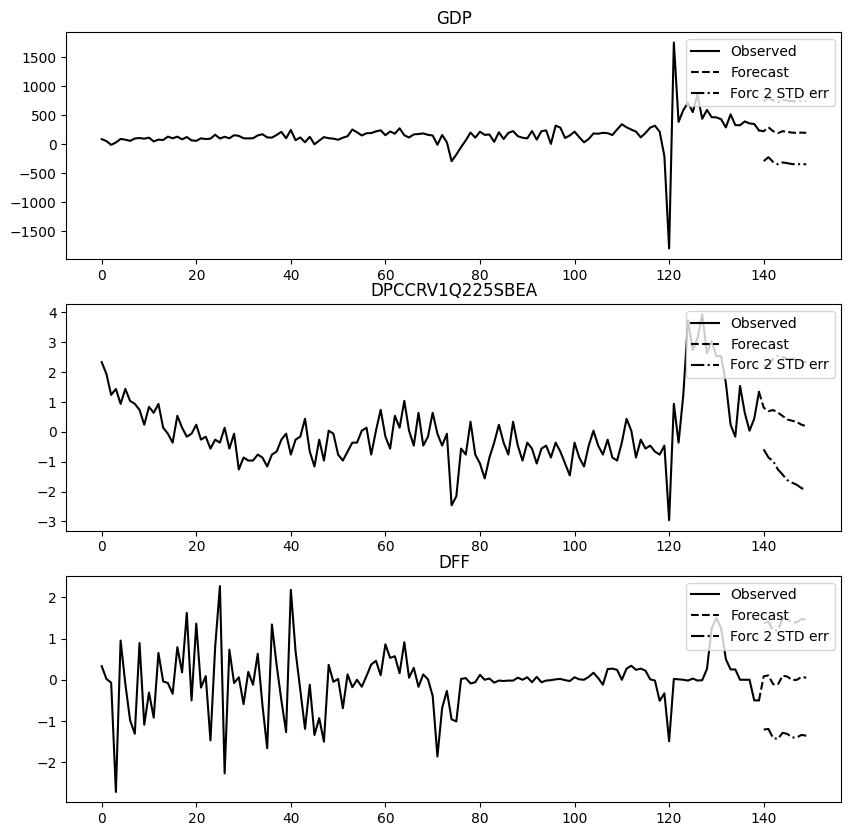

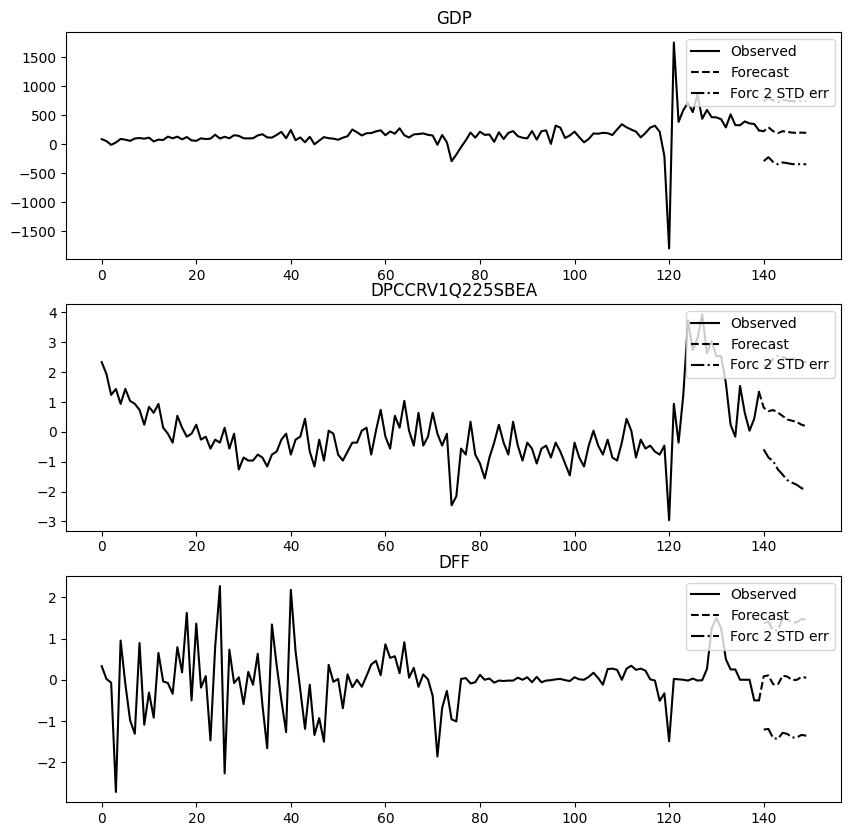

In [30]:
results.plot_forecast(10)

In [31]:
print(data.mean())

GDP                172.066757
DPCCRV1Q225SBEA     -0.018126
DFF                 -0.026000
dtype: float64


In [32]:
print(data['GDP']-data['GDP'].mean())

observation_date
1990-04-01    -84.739757
1990-07-01   -116.978757
1990-10-01   -182.449757
1991-01-01   -141.621757
1991-04-01    -80.382757
                 ...    
2024-01-01    155.035243
2024-04-01    220.578243
2024-07-01    186.133243
2024-10-01    176.883243
2025-01-01     66.116243
Name: GDP, Length: 140, dtype: float64
